# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 650


In [3]:
print(cities)

['cape town', 'busselton', 'shimoda', 'kargil', 'umm ruwabah', 'bredasdorp', 'victoria', 'lebu', 'poum', 'vaitupu', 'lamont', 'nikolskoye', 'mayo', 'rikitea', 'meulaboh', 'ushuaia', 'port alfred', 'vredendal', 'ilulissat', 'port augusta', 'cidreira', 'beringovskiy', 'punta arenas', 'barrow', 'karaul', 'codrington', 'illoqqortoormiut', 'alugan', 'tessalit', 'hilo', 'kodiak', 'kavaratti', 'zyryanovsk', 'atuona', 'yellowknife', 'hobart', 'borogontsy', 'avarua', 'airai', 'khatanga', 'faanui', 'zhigansk', 'thompson', 'uchaly', 'kaitangata', 'san quintin', 'owando', 'ereymentau', 'belmonte', 'barentsburg', 'saskylakh', 'aitape', 'temaraia', 'kapaa', 'pevek', 'mar del plata', 'port elizabeth', 'hearst', 'mys shmidta', 'georgetown', 'pochutla', 'longyearbyen', 'luena', 'kahului', 'dikson', 'chuy', 'dawlatabad', 'hasaki', 'saint-philippe', 'havre-saint-pierre', 'ponta do sol', 'bethel', 'ouadda', 'attawapiskat', 'tsihombe', 'tilichiki', 'mataura', 'lompoc', 'vaini', 'batemans bay', 'katsuura', 

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        #sleep
        time.sleep(60) 

    # Create endpoint URL with each city
    city_url = f"{url}&q={city.replace(' ', '+')}"
    
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime("%m/%d/%Y,%H:%M:%S")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except: 
        print("City not found. Skipping...")
        pass
          
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | shimoda
Processing Record 4 of Set 1 | kargil
Processing Record 5 of Set 1 | umm ruwabah
City not found. Skipping...
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | victoria
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | poum
Processing Record 10 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 11 of Set 1 | lamont
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | mayo
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | meulaboh
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | vredendal
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | port augusta
Processing Record 21 of Set 1 | cidreira
Processing Record 22 of Set 1 | be

City not found. Skipping...
Processing Record 34 of Set 4 | vostok
Processing Record 35 of Set 4 | pilar
Processing Record 36 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 37 of Set 4 | spornoye
Processing Record 38 of Set 4 | villa del rosario
Processing Record 39 of Set 4 | touba
Processing Record 40 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 41 of Set 4 | muros
Processing Record 42 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 43 of Set 4 | iqaluit
Processing Record 44 of Set 4 | saraland
Processing Record 45 of Set 4 | husavik
Processing Record 46 of Set 4 | ilebo
Processing Record 47 of Set 4 | anadyr
Processing Record 48 of Set 4 | latung
Processing Record 49 of Set 4 | namatanai
Processing Record 0 of Set 5 | nchelenge
Processing Record 1 of Set 5 | shingu
Processing Record 2 of Set 5 | san policarpo
Processing Record 3 of Set 5 | toftir
City not found. Skipping...
Processing Record 4 of Set 5 | ko

Processing Record 18 of Set 8 | panguna
Processing Record 19 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 20 of Set 8 | gizo
Processing Record 21 of Set 8 | gushikawa
Processing Record 22 of Set 8 | belaya
Processing Record 23 of Set 8 | balikpapan
Processing Record 24 of Set 8 | alekseyevsk
Processing Record 25 of Set 8 | mayor pablo lagerenza
Processing Record 26 of Set 8 | dicabisagan
Processing Record 27 of Set 8 | bathsheba
Processing Record 28 of Set 8 | vila franca do campo
Processing Record 29 of Set 8 | skalistyy
City not found. Skipping...
Processing Record 30 of Set 8 | praia da vitoria
Processing Record 31 of Set 8 | sao miguel do araguaia
Processing Record 32 of Set 8 | karakendzha
City not found. Skipping...
Processing Record 33 of Set 8 | harper
Processing Record 34 of Set 8 | udachnyy
Processing Record 35 of Set 8 | azimur
City not found. Skipping...
Processing Record 36 of Set 8 | port moresby
Processing Record 37 of Set 8 | barroualie
City not

Processing Record 3 of Set 12 | pisco
Processing Record 4 of Set 12 | rio gallegos
Processing Record 5 of Set 12 | ahipara
Processing Record 6 of Set 12 | carapicuiba
Processing Record 7 of Set 12 | puerto escondido
Processing Record 8 of Set 12 | bay city
Processing Record 9 of Set 12 | unity
Processing Record 10 of Set 12 | dandong
Processing Record 11 of Set 12 | canon city
Processing Record 12 of Set 12 | verkhnevilyuysk
Processing Record 13 of Set 12 | margate
Processing Record 14 of Set 12 | dafeng
Processing Record 15 of Set 12 | umm jarr
City not found. Skipping...
Processing Record 16 of Set 12 | chernyshevskiy
Processing Record 17 of Set 12 | cap-aux-meules
Processing Record 18 of Set 12 | aksu
Processing Record 19 of Set 12 | angoche
Processing Record 20 of Set 12 | tura
Processing Record 21 of Set 12 | george
Processing Record 22 of Set 12 | maple creek
Processing Record 23 of Set 12 | salalah
Processing Record 24 of Set 12 | yulara
Processing Record 25 of Set 12 | talnakh


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cape town,-33.9258,18.4232,20.62,76,0,3.09,ZA,"01/20/2023,23:55:00"
1,busselton,-33.6500,115.3333,24.69,43,0,5.51,AU,"01/20/2023,23:56:27"
2,shimoda,34.6667,138.9500,7.20,63,81,5.56,JP,"01/20/2023,23:55:32"
3,kargil,34.5667,76.1000,-21.34,92,92,1.74,IN,"01/20/2023,23:56:28"
4,bredasdorp,-34.5322,20.0403,19.42,86,3,0.36,ZA,"01/20/2023,23:56:29"


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cape town,-33.9258,18.4232,20.62,76,0,3.09,ZA,"01/20/2023,23:55:00"
1,busselton,-33.6500,115.3333,24.69,43,0,5.51,AU,"01/20/2023,23:56:27"
2,shimoda,34.6667,138.9500,7.20,63,81,5.56,JP,"01/20/2023,23:55:32"
3,kargil,34.5667,76.1000,-21.34,92,92,1.74,IN,"01/20/2023,23:56:28"
4,bredasdorp,-34.5322,20.0403,19.42,86,3,0.36,ZA,"01/20/2023,23:56:29"


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

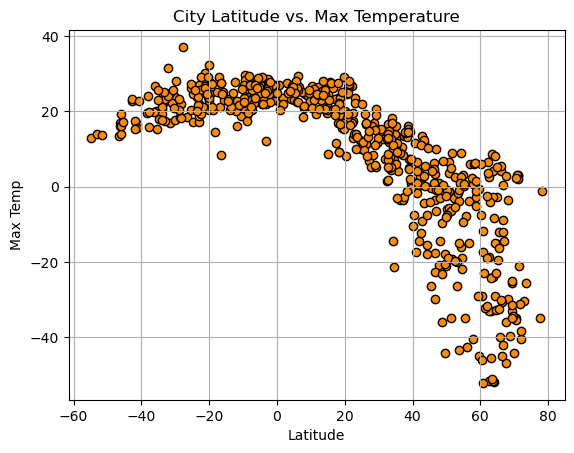

In [25]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, color='darkorange', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('City Latitude vs. Max Temperature')

# Incorporate the other graph properties (add grid for clarity)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

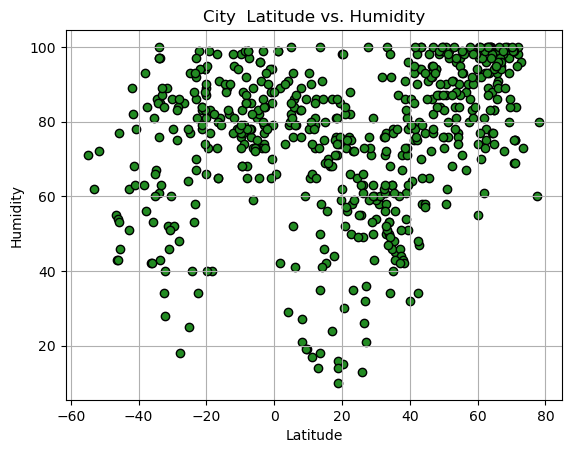

In [21]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, color='forestgreen', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City  Latitude vs. Humidity')

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

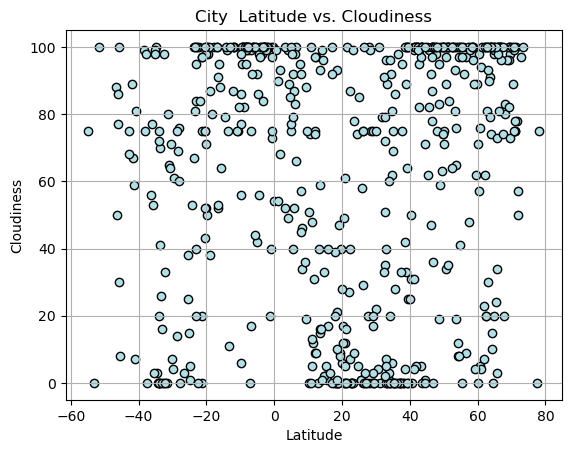

In [19]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, color='powderblue', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City  Latitude vs. Cloudiness')

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

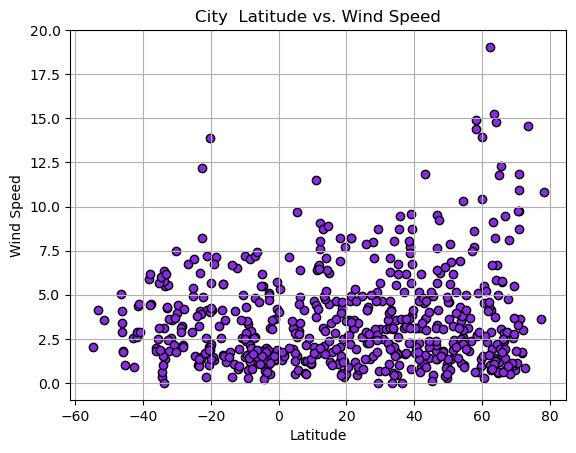

In [26]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, color='blueviolet', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City  Latitude vs. Wind Speed')


# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [70]:
# Define a function to create Linear Regression plots
def linreg_eq (x_axis, y_axis, eq_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    # Get regression values
    regress_values = x_axis * slope + intercept
    #line eq
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    #add eq to graph
    plt.annotate(line_eq, eq_coord, fontsize=15, color="red")
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regress_values, 'r-')
    plt.tight_layout()
    print(f"The r-value is: {rvalue}")
    plt.show() 

In [71]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat']>=0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,shimoda,34.6667,138.9500,7.20,63,81,5.56,JP,"01/20/2023,23:55:32"
3,kargil,34.5667,76.1000,-21.34,92,92,1.74,IN,"01/20/2023,23:56:28"
5,victoria,22.2855,114.1577,17.36,82,87,3.58,HK,"01/20/2023,23:53:26"
8,lamont,35.2597,-118.9143,13.08,48,0,1.62,US,"01/20/2023,23:56:31"
9,nikolskoye,59.7035,30.7861,-0.67,94,89,0.96,RU,"01/20/2023,23:56:31"


In [72]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat'] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cape town,-33.9258,18.4232,20.62,76,0,3.09,ZA,"01/20/2023,23:55:00"
1,busselton,-33.6500,115.3333,24.69,43,0,5.51,AU,"01/20/2023,23:56:27"
4,bredasdorp,-34.5322,20.0403,19.42,86,3,0.36,ZA,"01/20/2023,23:56:29"
6,lebu,-37.6167,-73.6500,15.76,84,0,4.45,CL,"01/20/2023,23:56:30"
7,poum,-20.2333,164.0167,26.86,89,100,13.87,NC,"01/20/2023,23:56:30"


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8116490889691045


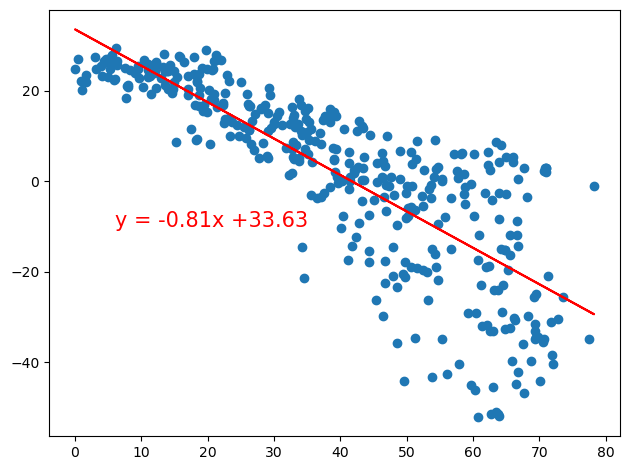

In [73]:
# Linear regression on Northern Hemisphere
linreg_eq(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],(6, -10))

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE